https://finance.yahoo.com/calendar/earnings/?day=2023-12-21
Options data for CTAS:
Average IV for Calls: 0.24523148709031997
Average IV for Puts: 0.40285013969577993
Total Call Volume: 785.0
Total Call open interest: 3503
Total Call engagement: 4288.0
Total Put Volume: 734.0
Total Put open interest: 4154
Total Put engagement: 4888.0
Number of ITM Call Options: 71
Number of ITM Put Options: 0


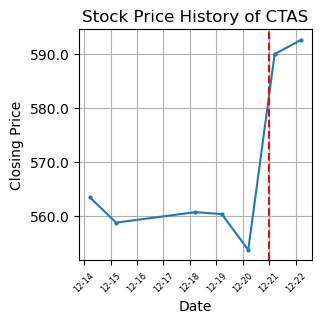

Options data for PAYX:
Average IV for Calls: 0.314152234331226
Average IV for Puts: 0.3212418362930068
Total Call Volume: 2012.0
Total Call open interest: 25933
Total Call engagement: 27945.0
Total Put Volume: 1431.0
Total Put open interest: 14285
Total Put engagement: 15716.0
Number of ITM Call Options: 44
Number of ITM Put Options: 24


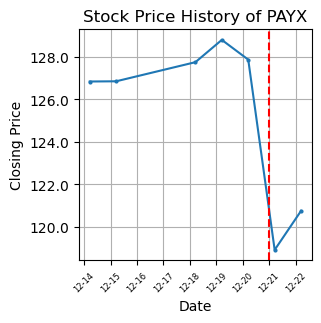

Options data for NKE:
Average IV for Calls: 0.4371159325825537
Average IV for Puts: nan
Total Call Volume: 225682.0
Total Call open interest: 358480
Total Call engagement: 584162.0
Total Put Volume: 196302.0
Total Put open interest: 420098.0
Total Put engagement: 616400.0
Number of ITM Call Options: 245
Number of ITM Put Options: 232


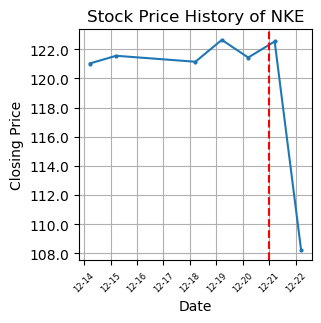

Options data for KMX:
Average IV for Calls: 0.6961285900778834
Average IV for Puts: 0.6593467931803724
Total Call Volume: 5595.0
Total Call open interest: 59084
Total Call engagement: 64679.0
Total Put Volume: 7105.0
Total Put open interest: 97802
Total Put engagement: 104907.0
Number of ITM Call Options: 165
Number of ITM Put Options: 78


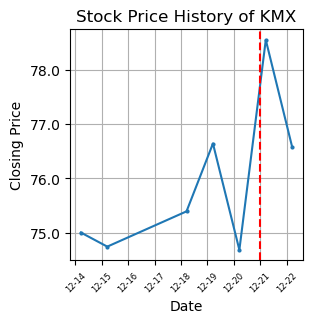

Options data for AIR:
Average IV for Calls: nan
Average IV for Puts: 0.2705463028564453
Total Call Volume: 569.0
Total Call open interest: 1637.0
Total Call engagement: 2206.0
Total Put Volume: 784.0
Total Put open interest: 1146
Total Put engagement: 1930.0
Number of ITM Call Options: 19
Number of ITM Put Options: 13


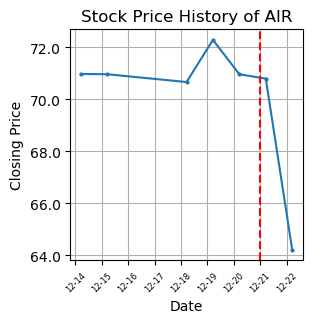

Options data for APOG:
Average IV for Calls: 0.35818864009312223
Average IV for Puts: nan
Total Call Volume: 111.0
Total Call open interest: 645
Total Call engagement: 756.0
Total Put Volume: 58.0
Total Put open interest: 817.0
Total Put engagement: 875.0
Number of ITM Call Options: 10
Number of ITM Put Options: 1


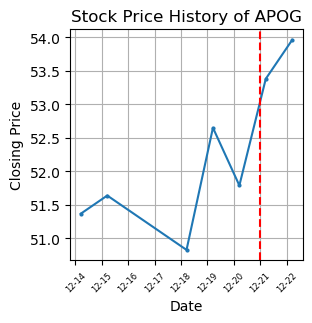

Options data for LMNR:
Average IV for Calls: 0.5694813017578125
Average IV for Puts: 0.5086312158203126
Total Call Volume: 174.0
Total Call open interest: 1425
Total Call engagement: 1599.0
Total Put Volume: 22.0
Total Put open interest: 179
Total Put engagement: 201.0
Number of ITM Call Options: 8
Number of ITM Put Options: 0


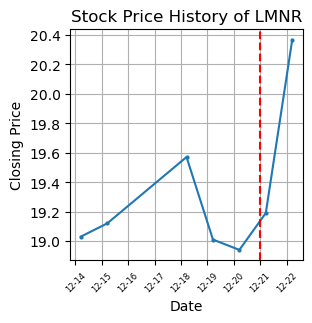

Options data for CCL:
Average IV for Calls: 0.9540705917046955
Average IV for Puts: 0.780879509662876
Total Call Volume: 94999.0
Total Call open interest: 1022230
Total Call engagement: 1117229.0
Total Put Volume: 32076.0
Total Put open interest: 1345871
Total Put engagement: 1377947.0
Number of ITM Call Options: 191
Number of ITM Put Options: 84


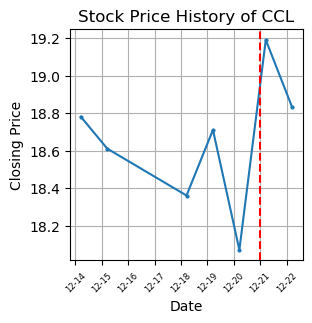

Options data for CUK:
Average IV for Calls: 0.66504954149882
Average IV for Puts: nan
Total Call Volume: 152.0
Total Call open interest: 1361
Total Call engagement: 1513.0
Total Put Volume: 62.0
Total Put open interest: 411.0
Total Put engagement: 473.0
Number of ITM Call Options: 11
Number of ITM Put Options: 4


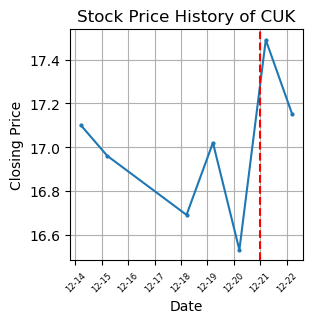

Options data for MDRX:
Average IV for Calls: 0.9915194101867676
Average IV for Puts: 0.8025826360270183
Total Call Volume: 755.0
Total Call open interest: 29134
Total Call engagement: 29889.0
Total Put Volume: 3403.0
Total Put open interest: 29777
Total Put engagement: 33180.0
Number of ITM Call Options: 10
Number of ITM Put Options: 7


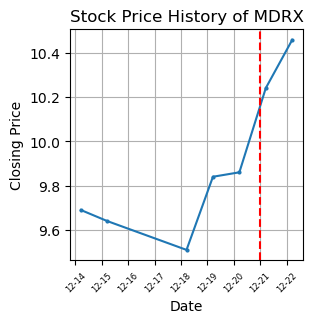

Options data for AVO:
Average IV for Calls: 0.7075910388183594
Average IV for Puts: 0.523116748046875
Total Call Volume: 224.0
Total Call open interest: 3030
Total Call engagement: 3254.0
Total Put Volume: 332.0
Total Put open interest: 840
Total Put engagement: 1172.0
Number of ITM Call Options: 3
Number of ITM Put Options: 3


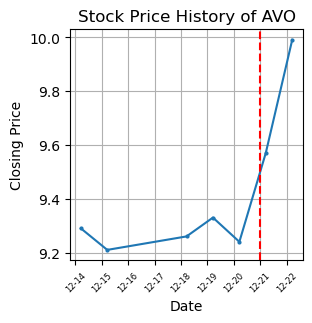

Options data for ISSC:
Average IV for Calls: 0.7028689674479166
Average IV for Puts: nan
Total Call Volume: 27.0
Total Call open interest: 155
Total Call engagement: 182.0
Total Put Volume: 16.0
Total Put open interest: 22.0
Total Put engagement: 38.0
Number of ITM Call Options: 4
Number of ITM Put Options: 1


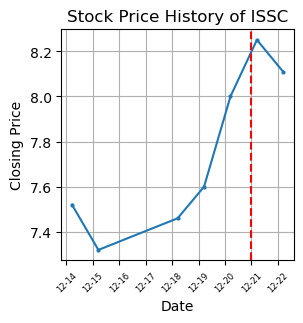

Options data for CVM:
Average IV for Calls: nan
Average IV for Puts: 2.0747547306565504
Total Call Volume: 427.0
Total Call open interest: 26872.0
Total Call engagement: 27299.0
Total Put Volume: 1274.0
Total Put open interest: 5032
Total Put engagement: 6306.0
Number of ITM Call Options: 6
Number of ITM Put Options: 16


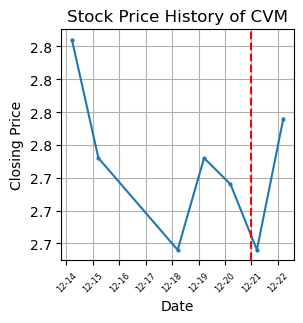

Options data for SDCCQ:
Average IV for Calls: 3.419643828125
Average IV for Puts: 0.0
Total Call Volume: 1234.0
Total Call open interest: 62248.0
Total Call engagement: 63482.0
Total Put Volume: 65.0
Total Put open interest: 10938.0
Total Put engagement: 11003.0
Number of ITM Call Options: 0
Number of ITM Put Options: 25


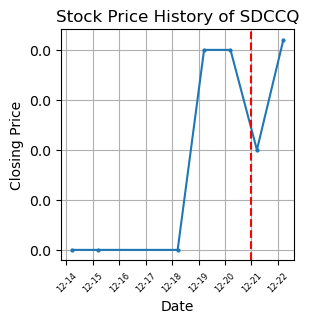

Options data for HGEN:
Average IV for Calls: 0.29166958333333337
Average IV for Puts: nan
Total Call Volume: 261
Total Call open interest: 841
Total Call engagement: 1102
Total Put Volume: 14.0
Total Put open interest: 97.0
Total Put engagement: 111.0
Number of ITM Call Options: 0
Number of ITM Put Options: 5


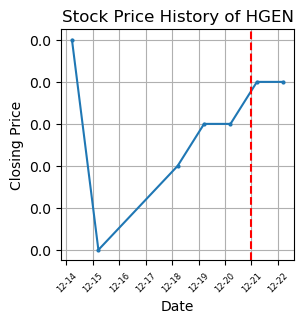

In [1]:
from datetime import datetime, timedelta
from utils import *  

# Call the function and store the result
day = '2023-12-21'

# First page
url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day

print(url)

ticker_data_sorted, ticker_data_list = scrape_and_process_yahoo_finance_data(url)

# # Second page
# url += '&offset=100&size=100'

# print(url)

# ticker_data_sorted, ticker_data_list = scrape_and_process_yahoo_finance_data(url, ticker_data_list)

# Set the time frame
release_date = datetime.strptime(day, '%Y-%m-%d')
end_date = release_date + timedelta(days=4)
start_date = release_date - timedelta(days=7)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)

    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Print 
    print_options_data(ticker, options_metrics)

    # Call the plot_stock_history method
    plot_stock_history(ticker, start_date, end_date, release_date=release_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
